# Diabetes Prediction

By Ved Sriraman and Cyrus Irani

Dataset: https://www.kaggle.com/uciml/pima-indians-diabetes-database

Diabetes is a disorder in the body where the presence of sugar in the blood in general when glucose (sugar) is well above normal. The body essentially does not produce enough or respond normally to insulin, causing blood sugar (glucose) levels to be abnormally high. 

The dataset that we used is available at the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Content
The datasets consist of several medical predictor variables and one target variable: outcome. Predictor variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

Acknowledgements
Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.

Inspiration
Can you build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not?

The target variable is specified as "Outcome"; 1 indicates a diabetes test result being positive, 0 indicates negative.

The predictor variables include:

- Pregnancies: Number of times being pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- Blood Pressure: Diastolic blood pressure (mm Hg)
- Skin Thickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- Age: Age (years)

Outcome: Class variable (0 - 1)

This project seeks to determine whether or not a person has diabetes given different medical predictor variables and one target variable, Outcome. The predictor variables include the number of pregnancies the patient has had, their BMI, insulin level, thickness of skin, Blood Pressure, age, and so on. 

Since our prediction is also a binary variable (whether someone has diabetes or not), we used three classifiers as our models. Our first model was a K-Nearest-Neighbors model, our second was a logistic regression model, and our third was a Decision Tree. All of our variables were conveniently quantifiable. 

We have provided visualizations that depict the distributions of certain metrics that we use to predict diabetes status. For each of these diagrams, we selected visuals that would display the data most effectively, cleanly, and serve a clear purpose to our overarching mission.

We illustrated the number of pregnancies of the participants in a distplot which is essentially a histogram with a line/curve of best fit. This showed that the distribution of the participants had little to no pregnancies and was skewed to the right. The ages of the participants in the dataset were displayed in a histogram, which was also skewed to the right with a mode of 21 years old.
The glucose levels were displayed in a distplot, which shows that the participants’ glucose levels were close to a normal distribution. The blood pressures of the participants in the dataset were displayed by a box and whisker plot, which showed that the distribution was close to normal as the Interquartile Range was symmetrical around the median. The skin thickness of the participants in the dataset were displayed using a distplot with a median around 20 and a slight skew to the right. The Insulin levels of the participants were displayed in a displot and it can be observed that the insulin levels of the participants were low with a skew to the right. Finally, the distribution of BMI for the participants were displayed in distplot, which shows a relatively normal distribution.

We used the KNearestNeighbor model in order to describe the effect of optimizing the model by adding more neighbors and then plotting the number of neighbors against the accuracy score of the model. This allowed us to take a look at the relationship between the number of nearest neighbors and find a ‘sweet spot’ for finding the best accuracy. Looking at the two graphs, one for testing accuracy and the other for training accuracy, we see that the sweet spot for number of neighbors is about 15 because the two accuracies are about the same there. This is a good thing because if the training accuracy is too high then the model might be too specific and thus training too closely to the training data. On the other hand, if testing is too high then we are being too general with our model. These accuracies being close to one another is essentially the sweet spot that we are trying to achieve. After this point both accuracies kind of dip off or plateau. Along with these graphs, we created confusion matrices for our models and defined the components of sensitivity, specificity, accuracy, error, and precision from the matrices. 

Looking at the Decision Tree Classifier model, we can see that the most optimal complexity is not too large, which is almost similar to the idea of finding a sweet spot in the KNN model. Our first graph reasonably depicts how the training accuracy would significantly increase as our complexity increases, which is because the model would be training too closely to the training data by compartmentalizing the data up itself. The second graph looks a bit wonky, but this may be attributed to errors in the data itself. And the third graph demonstrates that backs up the first graph in minimizing the model complexity, because we want the two accuracies to be about the same.

Looking at the KNN and Logistic Regression Models in comparison, we see that the KNN model with 15 neighbors and the logistic regression model have about the same accuracy scores if you consider the optimal number of neighbors, and the values in the confusion matrix also align. But they both have higher accuracy scores than the KNN model with 1 neighbor. Using these three models have helped us decide/ evaluate different models for diabetes predictors. 

Thank you for this opportunity! 

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings

warnings.filterwarnings('ignore')
df = pd.read_csv('diabetes.csv')
df.head()
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


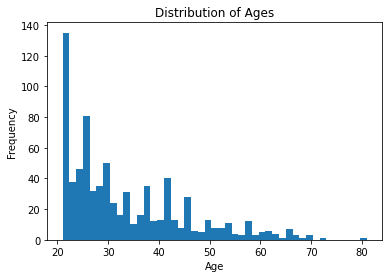

In [4]:
ages = (df['Age'])
plt.hist(ages, bins=45)
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Text(0, 0.5, 'Frequency')

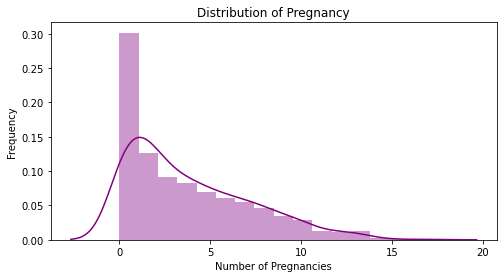

In [12]:
fig,axes = plt.subplots(nrows=1,ncols=1,figsize = (8,4))

plot=sns.distplot(df['Pregnancies'],ax=axes,color='purple')
axes.set_title('Distribution of Pregnancy')
axes.set_xlabel('Number of Pregnancies')
axes.set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

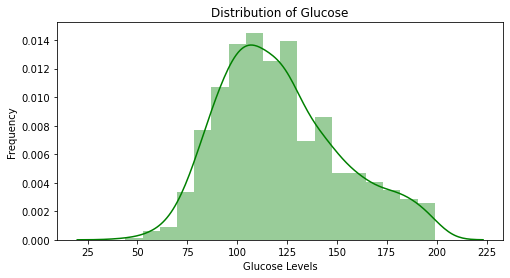

In [14]:
fig,axes = plt.subplots(nrows=1,ncols=1,figsize = (8,4))
df.Glucose = df.Glucose.replace(0,df.Glucose.mean())

plot=sns.distplot(df['Glucose'],ax=axes,color='green')
axes.set_title('Distribution of Glucose')
axes.set_xlabel('Glucose Levels')
axes.set_ylabel('Frequency')

Text(0.5, 1.0, 'Box Plot of Blood Pressure')

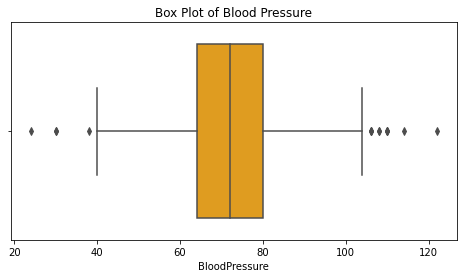

In [15]:
fig,axes = plt.subplots(nrows=1,ncols=1,figsize = (8,4))
df.BloodPressure = df.BloodPressure.replace(0,df.BloodPressure.median())
plot=sns.boxplot('BloodPressure',data=df,ax=axes, color='orange')
axes.set_title('Box Plot of Blood Pressure')



Text(0, 0.5, 'Frequency')

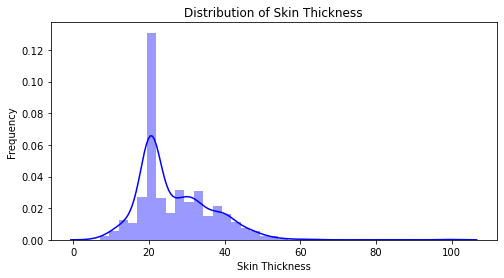

In [16]:
fig,axes = plt.subplots(nrows=1,ncols=1,figsize = (8,4))
df.SkinThickness = df.SkinThickness.replace(0,df.SkinThickness.mean())
plot=sns.distplot(df['SkinThickness'],ax=axes,color='blue')
axes.set_title('Distribution of Skin Thickness')
axes.set_xlabel('Skin Thickness')
axes.set_ylabel('Frequency')


Text(0, 0.5, 'Frequency')

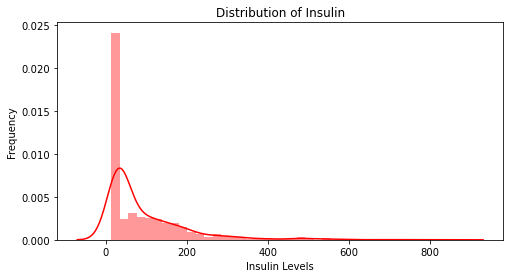

In [17]:
fig,axes = plt.subplots(nrows=1,ncols=1, figsize = (8,4))
df.Insulin = df.Insulin.replace(0,df.Insulin.median())
plot=sns.distplot(df['Insulin'],ax=axes,color='red')
axes.set_title('Distribution of Insulin')
axes.set_xlabel('Insulin Levels')
axes.set_ylabel('Frequency')


Text(0, 0.5, 'Frequency')

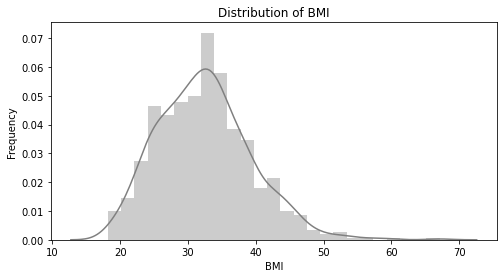

In [18]:
fig,axes = plt.subplots(nrows=1,ncols=1,figsize = (8,4))
df.BMI = df.BMI.replace(0,df.BMI.mean())
plot=sns.distplot(df['BMI'],ax=axes,color='grey')
axes.set_title('Distribution of BMI')
axes.set_xlabel('BMI')
axes.set_ylabel('Frequency')


In [11]:
from sklearn.linear_model import LogisticRegression
#define X
X = df.drop('Outcome',axis=1)
#define Y
Y = df['Outcome']
# split X and Y into train and test sets (using sklearn)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# create your model
model=LogisticRegression()
# fit your model
model.fit(x_train,y_train)
# predict on the testing data
predictions_test=model.predict(x_test)

#Confusion matrix for test data
conf_matrix = confusion_matrix(y_test,predictions_test)
print('The confusion matrix for the logistical regression model: ')
print()
print(conf_matrix)
print()
true_positive = conf_matrix[0][0]
false_negative = conf_matrix[0][1]
false_positive = conf_matrix[1][0]
true_negative = conf_matrix[1][1]

total = true_positive+false_negative+false_positive+true_negative

print("Sensitivity: ", true_positive/(true_positive+false_negative))
print("Specificity: ", true_negative/(true_negative+false_positive))
print("Accuracy: ", (true_positive+true_negative)/total)
print("Error: ", (false_positive+false_negative)/total)
print("Precision: ", true_positive/(true_positive+false_positive))

The confusion matrix for the logistical regression model: 

[[78 21]
 [18 37]]

Sensitivity:  0.7878787878787878
Specificity:  0.6727272727272727
Accuracy:  0.7467532467532467
Error:  0.2532467532467532
Precision:  0.8125


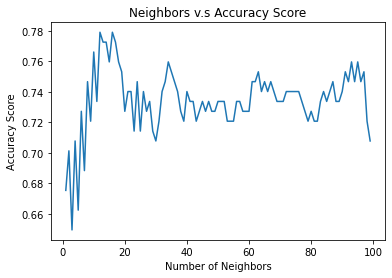

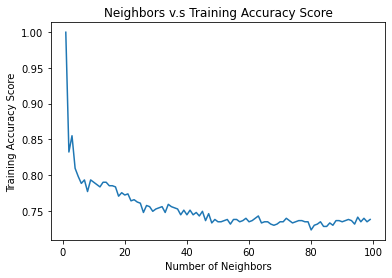


Confusion Matrix for KNearestNeighbor Model with 1 Neighbor:
[[70 29]
 [21 34]]
Sensitivity:  0.7070707070707071
Specificity:  0.6181818181818182
Accuracy:  0.6753246753246753
Error:  0.3246753246753247
Precision:  0.7692307692307693

Confusion Matrix for KNearestNeighbor Model with 10 Neighbors:
[[86 13]
 [23 32]]
Sensitivity:  0.8686868686868687
Specificity:  0.5818181818181818
Accuracy:  0.7662337662337663
Error:  0.23376623376623376
Precision:  0.7889908256880734

Confusion Matrix for KNearestNeighbor Model with 100 Neighbors:
[[93  6]
 [37 18]]
Sensitivity:  0.9393939393939394
Specificity:  0.32727272727272727
Accuracy:  0.7207792207792207
Error:  0.2792207792207792
Precision:  0.7153846153846154


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#Using KNN to test on different sets of neighbors
#separate your X (features) and your Y (target). 
X = df.drop('Outcome',axis=1).values
Y = df['Outcome'].values

#train test split your data with 20% being used for testing
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# This is the function we use to create the kNN model (default k=5)
knn = KNeighborsClassifier()

#We can calculate individual accuracies and then append the values to make it easier for ourselves.
accuracy_array=[]
for i in range (1,100):
    knn=KNeighborsClassifier(i)
    #fit the model using the train data
    knn.fit(x_train,y_train)
    #determine the prediction using the testing data
    predictions=knn.predict(x_test)
    acc=accuracy_score(y_test,predictions)
    accuracy_array.append(acc)
    
accuracy2_array=[]
for i in range (1,100):
    knn=KNeighborsClassifier(i)
    #fit the model using the train data
    knn.fit(x_train,y_train)
    #determine the prediction using the testing data
    predictions2=knn.predict(x_train)
    acc2=accuracy_score(y_train,predictions2)
    accuracy2_array.append(acc2)

ran=range(1,100)
plt.plot(ran,accuracy_array)
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy Score')
plt.title('Neighbors v.s Accuracy Score')
plt.show()

r=range(1,100)
plt.plot(r,accuracy2_array)
plt.xlabel('Number of Neighbors')
plt.ylabel('Training Accuracy Score')
plt.title('Neighbors v.s Training Accuracy Score')
plt.show()

#Confusion Matrix for KNearestNeighbor Model with 1 Neighbor
knn=KNeighborsClassifier(1)
knn.fit(x_train,y_train)
predictions=knn.predict(x_test)
conf_matrix = confusion_matrix(y_test,predictions)
print()

print("Confusion Matrix for KNearestNeighbor Model with 1 Neighbor:")
print(conf_matrix)

true_positive = conf_matrix[0][0]
false_negative = conf_matrix[0][1]
false_positive = conf_matrix[1][0]
true_negative = conf_matrix[1][1]
total = true_positive+false_negative+false_positive+true_negative

print("Sensitivity: ", true_positive/(true_positive+false_negative))
print("Specificity: ", true_negative/(true_negative+false_positive))
print("Accuracy: ", (true_positive+true_negative)/total)
print("Error: ", (false_positive+false_negative)/total)
print("Precision: ", true_positive/(true_positive+false_positive))

#Confusion Matrix for KNearestNeighbor Model with 10 Neighbors
knn=KNeighborsClassifier(10)
knn.fit(x_train,y_train)
predictions=knn.predict(x_test)
conf_matrix = confusion_matrix(y_test,predictions)
print()

print("Confusion Matrix for KNearestNeighbor Model with 10 Neighbors:")
print(conf_matrix)

true_positive = conf_matrix[0][0]
false_negative = conf_matrix[0][1]
false_positive = conf_matrix[1][0]
true_negative = conf_matrix[1][1]
total = true_positive+false_negative+false_positive+true_negative

print("Sensitivity: ", true_positive/(true_positive+false_negative))
print("Specificity: ", true_negative/(true_negative+false_positive))
print("Accuracy: ", (true_positive+true_negative)/total)
print("Error: ", (false_positive+false_negative)/total)
print("Precision: ", true_positive/(true_positive+false_positive))

#Confusion Matrix for KNearestNeighbor Model with 100 Neighbors
knn=KNeighborsClassifier(100)
knn.fit(x_train,y_train)
predictions=knn.predict(x_test)
conf_matrix = confusion_matrix(y_test,predictions)
print()

print("Confusion Matrix for KNearestNeighbor Model with 100 Neighbors:")
print(conf_matrix)

true_positive = conf_matrix[0][0]
false_negative = conf_matrix[0][1]
false_positive = conf_matrix[1][0]
true_negative = conf_matrix[1][1]
total = true_positive+false_negative+false_positive+true_negative

print("Sensitivity: ", true_positive/(true_positive+false_negative))
print("Specificity: ", true_negative/(true_negative+false_positive))
print("Accuracy: ", (true_positive+true_negative)/total)
print("Error: ", (false_positive+false_negative)/total)
print("Precision: ", true_positive/(true_positive+false_positive))

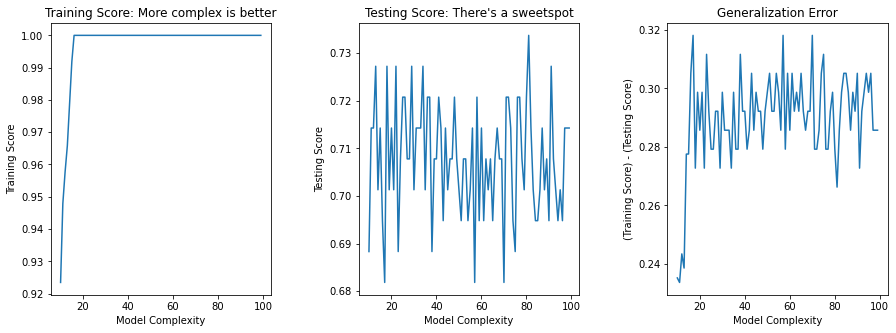

In [13]:
from sklearn.tree import DecisionTreeClassifier

X = df[['Pregnancies','Glucose','BloodPressure','BMI']]
Y = df['Outcome']

x_tr, x_te, y_tr, y_te = train_test_split(X, Y, test_size = 0.2, random_state=42)
train_scores = []
test_scores = []

max_depths = list(range(10,100))
for i in max_depths:
    model = DecisionTreeClassifier(max_depth=i)

    model.fit(x_tr, y_tr)
    
    train_scores.append(model.score(x_tr, y_tr))
    test_scores.append(model.score(x_te, y_te))
    
plt.subplots(figsize=(15,5))
plt.subplots_adjust(wspace=0.4)
plt.subplot(131)
plt.plot(max_depths, train_scores)
plt.title('Training Score: More complex is better')
plt.xlabel('Model Complexity')
plt.ylabel('Training Score')
plt.subplot(132)
plt.plot(max_depths, test_scores)
plt.title("Testing Score: There's a sweetspot")
plt.xlabel('Model Complexity')
plt.ylabel('Testing Score')
plt.subplot(133)
plt.plot(max_depths, np.subtract(train_scores,test_scores))
plt.title("Generalization Error")
plt.xlabel('Model Complexity')
plt.ylabel('(Training Score) - (Testing Score)')
plt.show()